### Groupby on DataFrame

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})
dframe

,dataset1,dataset2,k1,k2
0,0.024343,-0.124217,X,alpha
1,-0.254899,-1.809396,X,beta
2,0.454503,-0.142549,Y,alpha
3,-0.261300,0.937091,Y,beta
4,0.185243,-0.289059,Z,alpha


In [4]:
group1 = dframe['dataset1'].groupby(dframe['k1'])

group1

In [5]:
group1.mean()

k1
X   -0.115278
Y    0.096601
Z    0.185243
Name: dataset1, dtype: float64

In [7]:
cities = np.array(['NY','LA','LA','NY','NY'])

month = np.array(['JAN', 'FEB', 'JAN', 'FEB', 'JAN'])

In [9]:
dframe['dataset1'].groupby([cities, month]).mean()

LA  FEB   -0.254899
    JAN    0.454503
NY  FEB   -0.261300
    JAN    0.104793
Name: dataset1, dtype: float64

In [10]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.115278,-0.966806
Y,0.096601,0.397271
Z,0.185243,-0.289059


In [11]:
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.024343 -0.124217
   beta  -0.254899 -1.809396
Y  alpha  0.454503 -0.142549
   beta  -0.261300  0.937091
Z  alpha  0.185243 -0.289059

In [12]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [13]:
for name, group in dframe.groupby('k1'):
    print("This is the {} group".format(name,))
    print(group, '\n')

This is the X group
   dataset1  dataset2 k1     k2
0  0.024343 -0.124217  X  alpha
1 -0.254899 -1.809396  X   beta 

This is the Y group
   dataset1  dataset2 k1     k2
2  0.454503 -0.142549  Y  alpha
3 -0.261300  0.937091  Y   beta 

This is the Z group
   dataset1  dataset2 k1     k2
4  0.185243 -0.289059  Z  alpha 



In [14]:
for (k1,k2), group in dframe.groupby(['k1','k2']):
    print("Key1 = {} Key2 = {}".format(k1,k2))
    print(group, '\n')

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0  0.024343 -0.124217  X  alpha 

Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1 -0.254899 -1.809396  X  beta 

Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.454503 -0.142549  Y  alpha 

Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3   -0.2613  0.937091  Y  beta 

Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4  0.185243 -0.289059  Z  alpha 



In [16]:
group_dict = dict(list(dframe.groupby('k1')))

In [17]:
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.024343,-0.124217,X,alpha
1,-0.254899,-1.809396,X,beta


In [18]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

In [19]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.024343 -0.124217
 1 -0.254899 -1.809396
 2  0.454503 -0.142549
 3 -0.261300  0.937091
 4  0.185243 -0.289059, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [20]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]

dataset2_group.mean()

dataset2
k1 k2             
X  alpha -0.124217
   beta  -1.809396
Y  alpha -0.142549
   beta   0.937091
Z  alpha -0.289059

### Groupby on Dicts & Series

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [3]:
animals = DataFrame(np.arange(16).reshape(4,4),
                    columns=['W','X','Y','Z'],
                    index=['Dog','Cat','Bird','Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [4]:
animals.loc[1:2,['W','Y']] = np.nan

animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [5]:
behavior_map={'W':'good','X':'bad','Y':'good','Z':'bad'}

In [6]:
animal_col = animals.groupby(behavior_map,axis=1)

animal_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0


In [7]:
behav_series = Series(behavior_map)

behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [9]:
animals.groupby(behav_series,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [10]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [11]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [12]:
keys = ['a','b','a','b']

In [13]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 a   0.0   1   2.0   3
  b   NaN   5   NaN   7
4 a   8.0   9  10.0  11
5 b  12.0  13  14.0  15

In [16]:
hier_col = pd.MultiIndex.from_arrays([['ny','ny','ny','sf','sf'],
                                      [1,2,3,1,2]],
                                     names=['City','sub_value'])

In [24]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

In [25]:
dframe_hr = dframe_hr * 100
dframe_hr

City         ny                sf      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

### Aggregation

In [26]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [27]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [28]:
dframe_wine = pd.read_csv('winequality-red.csv', sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [31]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [32]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [33]:
wino = dframe_wine.groupby('quality')

wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [34]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [35]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [36]:
dframe_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [38]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [39]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


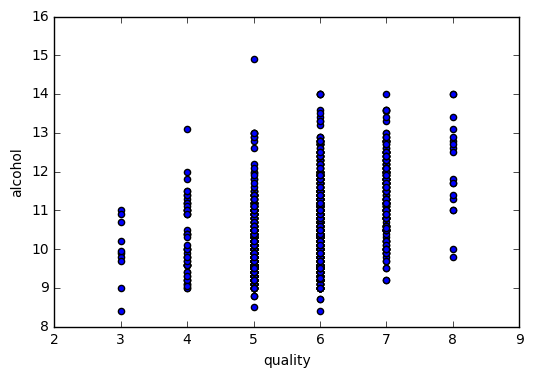

In [41]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

### Split, Apply & Combine

In [58]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [59]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

dframe_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [60]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [61]:
dframe_wine.sort_values('alcohol', ascending=False, inplace=True)
dframe_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7


In [62]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [63]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [65]:
num_of_qual = dframe_wine['quality'].value_counts()

num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [66]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


### Cross-Tabulation

In [1]:
import pandas as pd

In [2]:
from io import StringIO

In [3]:
data = """\
Sample Animal Intelligence
1 Dog Smart
2 Dog Dumb
3 Cat Dumb
4 Cat Smart
5 Cat Smart
6 Dog Dumb"""

In [5]:
dframe = pd.read_csv(StringIO(data), sep='\s+')
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Dumb
2,3,Cat,Dumb
3,4,Cat,Smart
4,5,Cat,Smart
5,6,Dog,Dumb


In [7]:
pd.crosstab(dframe.Animal, dframe.Intelligence, margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,1,2,3
Dog,2,1,3
All,3,3,6
